# Etapa 1 - Atividades


In [1]:
#Vamos importar os módulos que precisamos
from math import *
from cmath import *
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#---------------------------------------------------VARIAVEIS-----------------------------------------------------------
# primario
r1 = 0.8 #freq 36kHz
l1 = 199.5 * 10**(-6) #freq 36kHz
c1 = 0.1 * 10**(-6)
#secundario
r2 = 0.8 #freq 36kHz
l2 = 187.6 * 10**(-6) #freq 36kHz
c2 = 0.1 * 10**(-6)
rc = 9860
#outros
freq = 36000 #2*pi*f
vp = 15
v1 = (2/pi)*vp #fasor
k = 0.1

## 1)Elaboração do diagrama do modelo eletrodinâmico do circuito WPT:

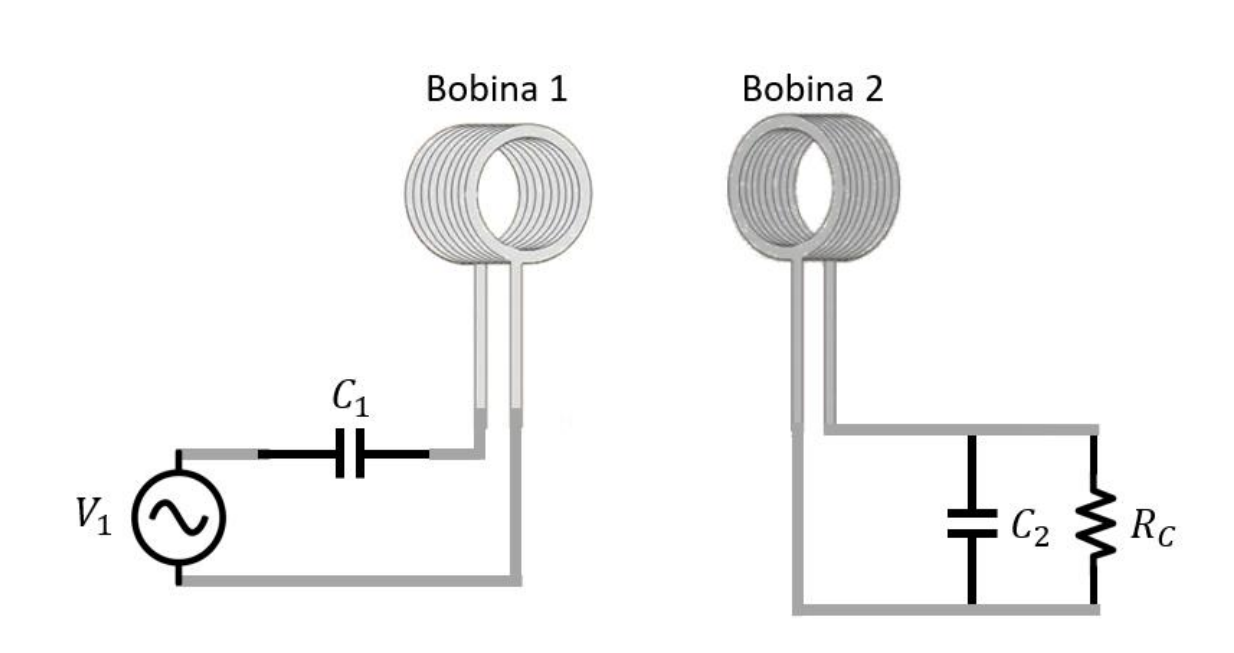

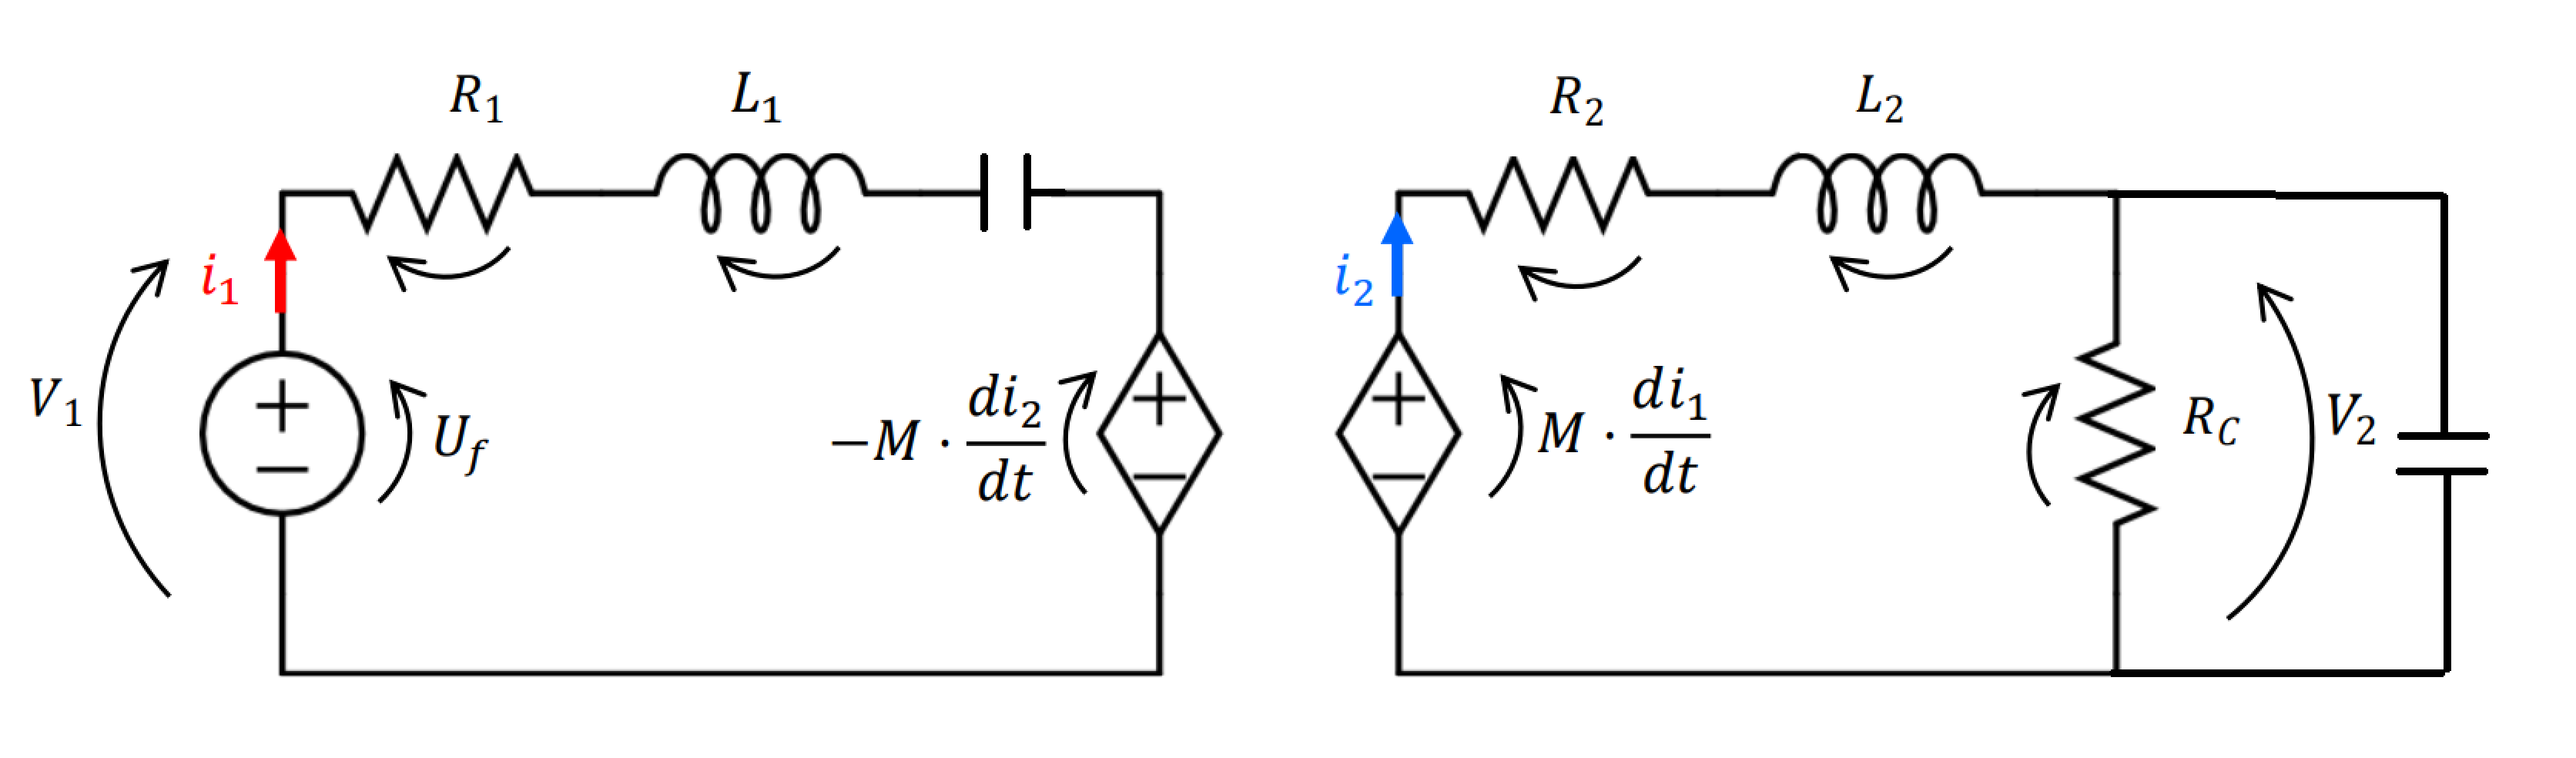

Frequência de ressonancia para cirtuico LC:
f = 1 / (2π √L C)

In [3]:
freq_res = 1/(2*pi*sqrt(l1*c1))
print("Frequencia de ressonancia: {0} Hz".format(freq_res))

#vamos arredondar pra 36 kHz

Frequencia de ressonancia: (35632.69591364662+0j) Hz


## 2) Código do modelo numérico:

In [4]:
#---------------------------------------------------FUNÇÃO-----------------------------------------------------------
def CalcularTransformador(v1,rc,r1,freq,k,r2):
    #Frequência angular
    w = 2*pi*freq

    #Reatâncias indutivas de L1
    xl1 = 1j*w*l1     
    
    #Reatâncias indutivas de C1
    xc1 = 1/(1j*w*c1)
    
    #Reatâncias indutivas de L2
    xl2 = 1j*w*l2
    
    #Reatâncias indutivas de C2
    xc2 = 1/(1j*w*c2)
    
    #Indutância Mútua
    M = k*(sqrt(l1*l2))
    
    #Reatâncias indutivas mútua
    xm = 1j*w*M      
    
    #Reatâncias equivalente capacitor e resistor do segundo circuito
    Xeq = (rc*xc2)/(rc+xc2)
    
    Z=np.array([[r1+xl1+xc1, -xm],[-xm, xl2+r2+Xeq]])
    V=np.array([v1,0])
    I=np.dot(linalg.inv(Z),V)
    return I[0], I[1], Xeq

In [5]:
#podemos apagar essa célula

#validando o modelo
freq_reso = 36e3
CalcularTransformador(5,10,0.5,freq_reso,k,0.5)

((5.153332623062208-3.94899681975048j),
 (0.6276671262384599-0.2729620786813551j),
 (9.513263127416526-2.1518494237986063j))

In [6]:
#validando o modelo com valores do sistema físico

v1, rc, r1,freq_reso,  k, r2, CalcularTransformador(5,rc,r1,freq_res,k,r2)

(9.549296585513721,
 9860,
 0.8,
 36000.0,
 0.1,
 0.8,
 ((0.3264681838302533-0.6451884528354959j),
  (-0.11916813868088126+1.094093141077819j),
  (0.20232850530789998-44.66450632786434j)))

___
## 3) Construção de gráficos de I1 e I2 em função da frequência:

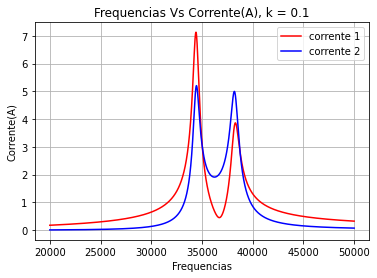

In [42]:
valores_freq = np.arange(2*10**4, 5*10**4, 0.5).tolist()
lista_i1 = []
lista_i2 = []
lista_maior = []
for frequencias in valores_freq:    
    i1,i2,xeq = CalcularTransformador(v1,rc,r1,frequencias,k,r2)
    lista_i1.append(abs(i1))
    lista_i2.append(abs(i2))
    if frequencias>35000:
        lista_maior.append(abs(i2))

plt.plot(valores_freq,lista_i1, "r", label='corrente 1')
plt.plot(valores_freq,lista_i2, "b", label='corrente 2')
plt.xlabel("Frequencias")
plt.ylabel("Corrente(A)")
plt.title("Frequencias Vs Corrente(A), k = 0.1")
plt.legend()
plt.grid()

## Frequência de ressonância teórica --> mudar esse texto
Como visível no gráfico acima, a corrente 2 (presente na bobina 2 e no circuito secundário) apresenta um pico positivo e outro negativo. A corrente 1 (presente na bobina 1 e no circuito primário) apresenta dois picos positivos, porém, o maior deles coincide com a posição do pico negativo da corrente 2. Como não queremos trabalhar com correntes negativas, analisaremos a corrente 2 para obter o valor da frequência que corresponde ao pico positivo da corrente 2 e um pico da corrente 1. Essa frequência corresponderá à frequência de ressonância teórica.

In [46]:
#pegar segundo pico (ignorar o primeiro)
max(lista_maior)

4.996656352060468

In [47]:
maior_corrente =4.996656352060468
for i in range(0, len(lista_i2)):
    if lista_i2[i] == maior_corrente:
        indice = i
frequencia_ressonancia = valores_freq[indice]
print("Frequencia de ressonancia = {0} Hz".format(frequencia_ressonancia))

Frequencia de ressonancia = 38191.0 Hz


### Difereça entre frequência de ressonância teórica e física

A física foi medida pelos valores de indutância da bobina 1 e capacitância do capacitor do circuito primário. O seu valor é próximo do teórico obtido acima, por isso, a parte teórica do projeto será feita com a utilização do valor teórico (38,2295 kHz) e a parte física continuará sendo feita com o valor físico (36 kHz). Essa diferença será mantida pois, segundo o professor orientador, é normal e aceitável.

___
## 4) Construção de gráfico variando o fator de acoplamento em função das correntes 1 e 2:

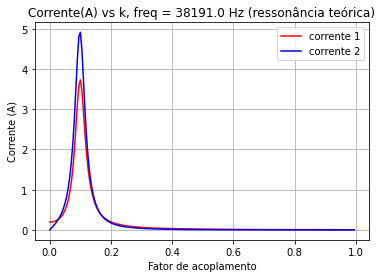

In [49]:
#variando o K
valores_k = np.arange(0, 1, 0.005).tolist()
lista_i1 = []
lista_i2 = []
for valores in valores_k:    
    i1,i2,xeq = CalcularTransformador(v1,rc,r1,frequencia_ressonancia,valores,r2)
    
    lista_i1.append(i1)
    lista_i2.append(i2)

plt.plot(valores_k,lista_i1, 'r', label="corrente 1")
plt.plot(valores_k,lista_i2, 'b', label="corrente 2")
plt.xlabel("Fator de acoplamento")
plt.ylabel("Corrente (A)")
plt.title("Corrente(A) vs k, freq = 38191.0 Hz (ressonância teórica)")
plt.legend()
plt.grid()

In [50]:
#encontro o maior valor de corrente na lista que as inseri (agora eu sei as frequências)
maior_corrente = max(lista_i2)

for i in range(0, len(valores_k)):
    if lista_i2[i] == maior_corrente:
        indice = i
fator_acoplamento_maior_corrente = valores_k[indice]
print("Fator acoplamento com a maior corrente, k = {0}".format(fator_acoplamento_maior_corrente))

Fator acoplamento com a maior corrente, k = 0.1


___
## 5) Construção de gráfico variando o fator de acoplamento em função da tensão 2:

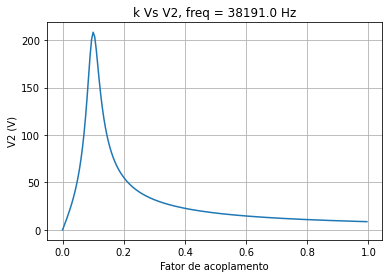

In [52]:
#variando o K
lista_v2 = []
for valores in valores_k:    
    i1,i2,xeq = CalcularTransformador(v1,rc,r1,frequencia_ressonancia,valores,r2)
    #estamos obtendo V2 ao mutiplicar a corrente 2 pela resistência equivalente do capacitor 2 e do resistor c (ambos no circuito secundário)
    v2 = i2*xeq
    lista_v2.append(abs(v2))
    
    
plt.plot(valores_k,lista_v2)
plt.xlabel("Fator de acoplamento")
plt.ylabel("V2 (V)")
plt.title("k Vs V2, freq = 38191.0 Hz")
plt.grid()

In [57]:
#encontro o maior valor de corrente na lista que as inseri (agora eu sei as frequências)
maior_corrente = max(lista_v2)

for i in range(0, len(valores_k)):
    if lista_v2[i] == maior_corrente:
        indice = i
fator_acoplamento_maior_corrente = valores_k[indice]
print("Fator acoplamento com a maior corrente, k = {0}".format(fator_acoplamento_maior_corrente))

Fator acoplamento com a maior corrente, k = 0.1


In [77]:
lista_v2

[0.0,
 4.251938694308463,
 8.562177435264534,
 12.991442344704257,
 17.60549683480451,
 22.47814143400061,
 27.694842831198898,
 33.357287979229376,
 39.589225425961736,
 46.54400631288089,
 54.41418793967956,
 63.443178578328286,
 73.93755663261791,
 86.27478032552435,
 100.890599029406,
 118.20514882062076,
 138.39409499619074,
 160.84299912010633,
 183.2101972067759,
 200.79392250945878,
 208.22587902517964,
 203.71005566956927,
 190.57921503723145,
 173.87689508241547,
 157.1439372746463,
 141.98679664083625,
 128.83563164153142,
 117.60543318080408,
 108.04308792319877,
 99.8733211231119,
 92.84971766978401,
 86.76689472711017,
 81.45858027087313,
 76.79158512485883,
 72.65938660261688,
 68.97652592225393,
 65.67406550131689,
 62.69602224138448,
 59.9966050134872,
 57.53808412525664,
 55.28914686971904,
 53.223623623854756,
 51.31949581643389,
 49.55811866488788,
 47.92360819081662,
 46.402354544577996,
 44.98263301897812,
 43.65429109160933,
 42.408495018724935,
 41.2375233748617

In [76]:
#valor de k para
valor_v2 = 64.25
for i in range(0, len(lista_v2)):
    if lista_v2[i] < valor_v2+0.6:
        if lista_v2[i] > valor_v2-0.6:
            indice = i
            k_valor = valores_k[indice]
            print("K= {0}".format(k_valor))

___

## 6)  Construção de gráficos das potências e da eficiência em função da frequência:

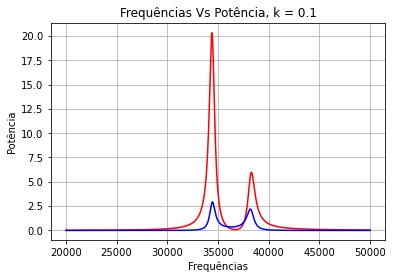

In [53]:
lista_P1 = []
lista_P2 = []

for frequencias in valores_freq: 
    resposta = CalcularTransformador(v1,rc,r1,frequencias,k,r2)
    i1,i2,xeq = resposta
    
    s1 = (r1*i1*i1.conjugate())/2
    #pegando a parte ativa
    P1 = s1.real
    lista_P1.append(P1)
    
    s2 = (xeq*i2*i2.conjugate())/2
    #pegando a parte ativa
    P2 = s2.real
    lista_P2.append(P2)

plt.plot(valores_freq,lista_P1, "r")
plt.plot(valores_freq,lista_P2, "b")
plt.xlabel("Frequências")
plt.ylabel("Potência")
plt.title("Frequências Vs Potência, k = 0.1")
plt.grid()

In [54]:
#esquentar mais o resistor:
maior_potencia = max(lista_P2)

for i in range(0, len(lista_P2)):
    if lista_P2[i] == maior_potencia:
        indice = i
        
frequencia_maior_potencia = valores_freq[indice]
print("Frequencia maior potencia = {0} Hz".format(frequencia_maior_potencia))

#essa variação é aceitável, normal e pequena. A vamos ignorar e manter no circuito físico a freq_res = 36k

Frequencia maior potencia = 34452.0 Hz


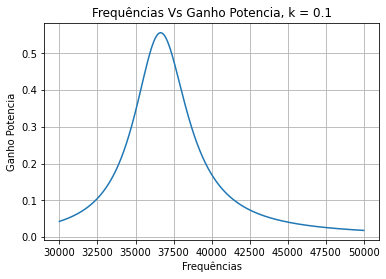

In [55]:
valores_freq = np.arange(3*10**4, 5*10**4, 0.5).tolist()
lista_ganhos = []
for frequencias in valores_freq:    
    resposta = CalcularTransformador(v1,rc,r1,frequencias,k,r2)
    i1,i2,xeq = resposta
    
    s1 = (10/pi*(i1.conjugate()))/2
    #pegando a parte ativa
    P1 = s1.real
    
    s2 = (xeq*i2*i2.conjugate())/2 #potencia na associacao do rc com capacitor
    #pegando a parte ativa
    P2 = s2.real                   #parte real da associacao eh so a do resistor

    lista_ganhos.append(P2/P1)

plt.plot(valores_freq,lista_ganhos)
plt.xlabel("Frequências")
plt.ylabel("Ganho Potencia")
plt.title("Frequências Vs Ganho Potencia, k = 0.1")
plt.grid()

In [56]:
#desperdicar menos
maior_eficiencia = max(lista_ganhos)
for i in range(0, len(lista_ganhos)):
    if lista_ganhos[i] == maior_eficiencia:
        indice = i
frequencia_maior_eficiencia = valores_freq[indice]
print("Frequência maior eficiência = {0} Hz".format(frequencia_maior_eficiencia))

Frequência maior eficiência = 36650.0 Hz


## Projetar as bobinas, com fios, dimensoes, numero de voltas e o site calcula a indutancia (https://physika.info/site/aplicativos/javascript/inkalc.htm)

* menor a bobina menor o fator de acoplamento
* maior a resistência pior, perde mais por efeito joule -> auto dissipação
* quanto mais fino o fio, maior a resistência
* ajustar para ter um numero de voltar aceitavel

### Final
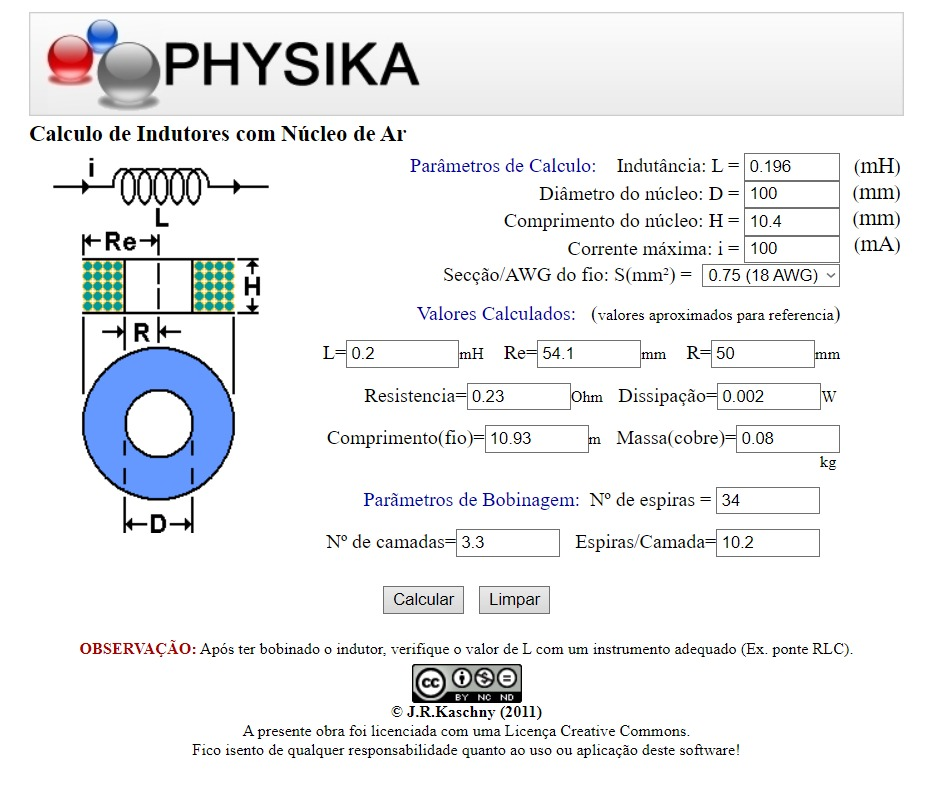